# Nonlinear Equations and their Roots
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

The purpose of root finding methods for nonlinear functions is to find the roots - or values of the independent variable, e.g. x - that make the nonlinear function equal to zero. The general form of a nonlinear root finding proposition is given as:

find $x$ such that 
\begin{equation}
f(x) = 0
\end{equation}

Alternatively, a problem may be presented as:

find $x$ such that 
\begin{equation}
f(x) = a
\end{equation}

then, one redefines this into what is called "residual" form
\begin{equation}
r(x) \equiv f(x) - a
\end{equation}
and reformulates the problem to find $x$ such that 
\begin{equation}
r(x) = 0
\end{equation}


In all examples below, we will explore the roots of the following function
\begin{equation}
\ln(x) + \cos(x)e^{-0.1x} = 2
\end{equation}
or, in residual form
\begin{equation}
r(x) \equiv \ln(x) + \cos(x)e^{-0.1x} - 2 = 0
\end{equation}
This function has three roots, 5.309, 8.045, and 10.02

In [1]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

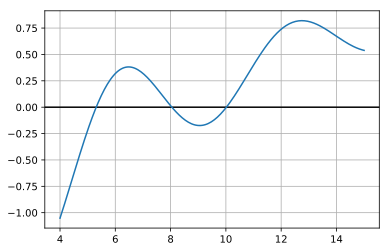

In [5]:
res = lambda x: np.log(x) + np.cos(x)*np.exp(-0.1*x)-2.0
x = np.linspace(4,15,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,res(x))

# Root Finding Methods

There are two classes of methods to find roots of equations:
1. Closed domain methods,
2. Open domain methods

Closed domain methods work by bracketing the root while open domain methods can start with an arbitrary initial guess.

# Close Domain Methods

## Bisection Method
Perhaps the most popular and intuitive root finding method, the Bisection method works by first bracketing a root and then successively improving the bracket by taking the midway point. An algorithm looks like the following
1. Choose values $a$ and $b$ such that the root, $x_0$ is $a \leq x_0 \leq b$
2. Calculate $c = \frac{a+b}{2}$ as the midway point between $a$ and $b$
3. Check which side the root is: if $f(a)\times f(c) < 0$ then $b = c$ else $a=c$
4. Check for convergence and repeat as necessary

Below is an example implementation of the bisection method

In [22]:
def bisect(f,a,b,tol, maxiter):
    err = tol + 100
    niter = 0
    print('{:<12} {:<12} {:<12} {:<12}'.format('Iteration','a','b','error'))
    while err > tol and niter < maxiter:
        niter +=1
        c = (a + b)/2.0
        fc = f(c)
        fa = f(a)
        if (fa * fc < 0.0):
            b = c
        else:
            a = c
        err = abs(fc)
        print('{:<12} {:<12} {:<12} {:<12}'.format(niter, round(a,6), round(b,6), round(err,10)))
    print('Iterations=',niter,' Root=',c)
    return c

In [25]:
bisect(res,4,5.5,1e-5,10)

Iteration    a            b            error       
1            4.75         5.5          0.418471165 
2            5.125        5.5          0.1256704432
3            5.125        5.3125       0.0020525841
4            5.21875      5.3125       0.0599408749
5            5.265625     5.3125       0.0284566567
6            5.289062     5.3125       0.0130777303
7            5.300781     5.3125       0.0054812004
8            5.306641     5.3125       0.0017064285
9            5.306641     5.30957      0.0001750523
10           5.308105     5.30957      0.0007651951
Iterations= 10  Root= 5.30810546875


5.30810546875

## Method of False Position (Regula-Falsi)
The Methods of False Position or Regula-Falsi takes into consideration how close a guess might be to a root. It requires two initial guesses that bracket the root but instead of cutting the bracket in half, the Falsi method connects the two guesses via a straight line and then finds the point at which this straight line intersects the x-axis and uses that as a new guess.

Here's the algorithm for the Regula-Falsi method:
1. Choose values $a$ and $b$ such that the root, $x_0$ is $a \leq x_0 \leq b$
2. Calculate the slope of the line connecting $a$ and $b$: $m = \frac{f(b) - f(a)}{b-a}$
3. Find the point at which this line intersects the x-axis: $c = b - \frac{f(b)}{m}$
3. Check which side the root is: if $f(a)\times f(c) < 0$ then $b = c$ else $a=c$
4. Check for convergence and repeat as necessary

In [7]:
def falsi(f,a,b,tol):
    niter = 0
    err = tol + 100
    print('{:<12} {:<12} {:<12} {:<12}'.format('Iteration','a','b','error'))
    
    while err > tol:
        fa = f(a)
        fb = f(b)
        m = (fb - fa)/(b - a)
        c = b - fb/m
        fc = f(c)
        err = abs(fc)
        if fc * fa < 0.0:
            b = c
        else:
            a = c
        err = abs(fc)
        print('{:<12} {:<12} {:<12} {:<12}'.format(niter, round(a,6), round(b,6), round(err,10)))            
        niter += 1
    print('Iterations:', niter, 'Root=',c)
    return c                

In [11]:
falsi(res,4,5.5,1e-5)

Iteration    a            b            error       
0            4            5.353774     0.0280786749
1            4            5.318575     0.0059333086
2            4            5.311179     0.0012065276
3            4            5.309677     0.0002433628
4            4            5.309374     4.90066e-05 
5            4            5.309313     9.8653e-06  
Iterations: 6 Root= 5.30931285069788


5.30931285069788

# Open Domain Methods
Closed domain methods require two initial guesses that bracket a root and are guaranteed to converge to the root, but in general are not practical when the root's location is unknown. Open domain methods relax this requirement and do not need initial guesses that bracket a root.

## The Secant Method
The secant method is identical to the regula-falsi method but does not require the initial guesses to bracket a root. Here's an algorithm for the secant method:
1. Choose values $a$ and $b$ that do not necessarily bracket a root
2. Calculate the slope of the line connecting $a$ and $b$: $m = \frac{f(b) - f(a)}{b-a}$
3. Find the point at which this line intersects the x-axis: $c = b - \frac{f(b)}{m}$
3. Set $a = b$ and $b = c$
4. Check for convergence and repeat as necessary

In [3]:
def secant(f,a,b,tol):
    niter = 0
    err = tol + 100
    print('{:<12} {:<12} {:<12} {:<12}'.format('Iteration','a','b','error'))
    
    while err > tol:
        fa = f(a)
        fb = f(b)
        m = (fb - fa)/(b - a)
        c = b - fb/m
        fc = f(c)
        err = abs(fc)
        a = b
        b = c
        print('{:<12} {:<12} {:<12} {:<12}'.format(niter, round(a,6), round(b,6), round(err,10)))                    
        niter += 1
    print('Iterations:', niter, 'Root=',c)
    return c                

In [12]:
secant(res,7,7.5,1e-5)

Iteration    a            b            error       
0            7.5          8.130598     0.0254859413
1            8.130598     8.051866     0.0019750738
2            8.051866     8.045252     4.76383e-05 
3            8.045252     8.045407     7.92e-08    
Iterations: 4 Root= 8.04540742136555


8.04540742136555

## Newton's Method
Newton's method is one of the most popular open domain nonlinear solvers. It is based on a two-term approximation of the Taylor series of a function $f(x)$. Given an initial guess $x_0$, Newton's method is implemented in the following steps:
1. Choose $x_0$ as an initial guess
2. Compute $f(x^0)$ and $f'(x^0)$
3. Compute $x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}
3. Set $x_0 = x_1$
4. Check for convergence and repeat as necessary

In [13]:
def newton(f,df,x0,tol):
    niter = 0
    err = tol + 100
    while err > tol and niter < 100:
        x1 = x0 - f(x0)/df(x0)
        x0 = x1
        err = abs(f(x0))
        niter += 1
    print('Iterations:', niter, 'Root=',x1)
    return x1                

In many cases, the derivative is not known and one must use a finite difference approximation to the derivative.

In [14]:
def newton2(f,x0,tol):
    niter = 0
    err = tol + 100
    while err > tol and niter < 100:
        delta = 1e-4 * x0 + 1e-12
        df = (f(x0 + delta) - f(x0))/delta
        x1 = x0 - f(x0)/df
        x0 = x1
        err = abs(f(x0))
        niter += 1
    print('Iterations:', niter, 'Root=',x1)
    return x1                

In [15]:
newton2(res,1,1e-5)

Iterations: 7 Root= 5.309297481151985


5.309297481151985

In [1]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get("https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css")
    return HTML(styles.text)
css_styling()
